# More Dfsu spectral files

In [1]:
import matplotlib.pyplot as plt
import mikeio

## Output from directional-sector-MIKE 21 SW run

MIKE 21 SW can be run with dicretized directions only in a directional sector. The reading and plotting of such spectra are also supported in MIKE IO.

In [2]:
fn = "../tests/testdata/spectra/MIKE21SW_dir_sector_area_spectra.dfsu"
dfs = mikeio.open(fn)
dfs

<mikeio.DfsuSpectral>
number of elements: 40
number of nodes: 33
number of directions: 19
number of frequencies: 25
projection: LONG/LAT
items:
  0:  Energy density <Wave energy density> (meter pow 2 sec per deg)
time: 2017-10-27 00:00:00 - 2017-10-27 05:00:00 (3 records)

In [3]:
dfs.geometry.is_spectral

True

In [4]:
da = dfs.read(time=0)["Energy density"]
da

<mikeio.DataArray>
name: Energy density
dims: (element:40, direction:19, frequency:25)
time: 2017-10-27 00:00:00 (time-invariant)
geometry: DfsuSpectral2D (40 elements, 33 nodes)

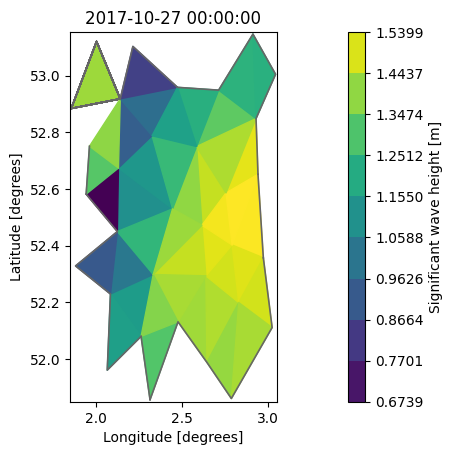

In [5]:
da.plot();

In [6]:
da_pt = da.isel(element=0)
da_pt

<mikeio.DataArray>
name: Energy density
dims: (direction:19, frequency:25)
time: 2017-10-27 00:00:00 (time-invariant)
geometry: Point Spectrum Geometry(frequency:25, direction:19, x:2.58616, y:52.13755)

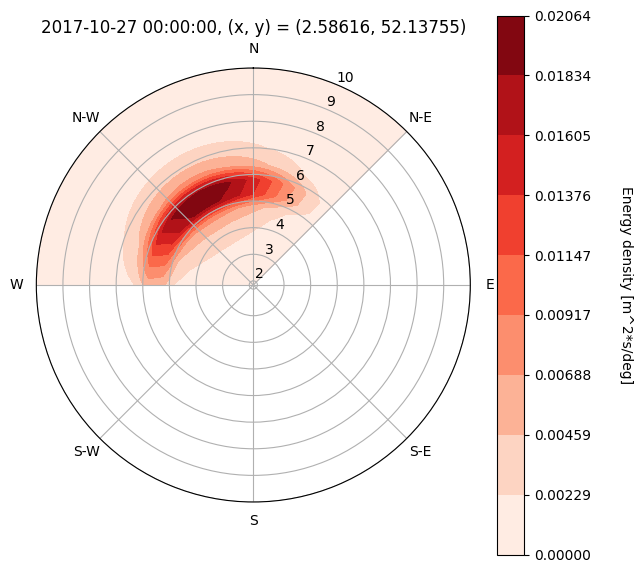

In [7]:
da_pt.plot(rmax=10, vmin=0);

## Frequency spectra

Frequency spectra have 0 directions. They can be of type point, line and area.

### Point frequency spectrum

In [8]:
fn = "../tests/testdata/spectra/pt_freq_spectra.dfsu"

In [9]:
da = mikeio.read(fn)[0]
da

<mikeio.DataArray>
name: Point 1: Directional integrated energy d
dims: (time:31, frequency:25)
time: 2017-10-27 00:00:00 - 2017-10-27 05:00:00 (31 records)
geometry: Point Spectrum Geometry(frequency:25, direction:0)

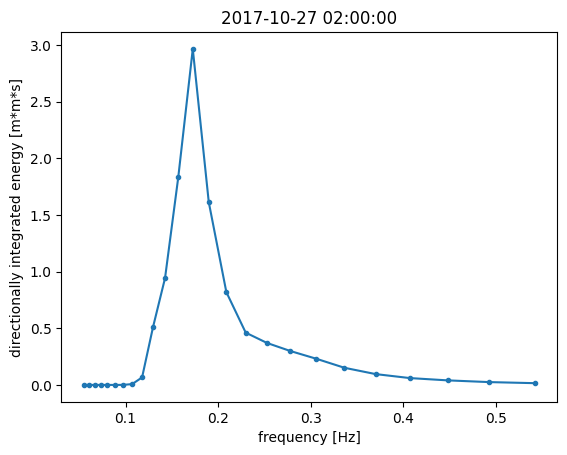

In [10]:
da.sel(time="2017-10-27 02:00").plot();

In [11]:
da.frequencies

array([0.055     , 0.0605    , 0.06655   , 0.073205  , 0.0805255 ,
       0.08857805, 0.09743585, 0.10717944, 0.11789738, 0.12968713,
       0.14265583, 0.15692142, 0.17261356, 0.18987492, 0.20886241,
       0.22974865, 0.25272352, 0.27799585, 0.30579546, 0.336375  ,
       0.3700125 , 0.40701374, 0.44771513, 0.49248663, 0.5417353 ],
      dtype=float32)

Compute significant wave height time series

In [12]:
Hm0 = da.to_Hm0()
Hm0

<mikeio.DataArray>
name: Significant wave height
dims: (time:31)
time: 2017-10-27 00:00:00 - 2017-10-27 05:00:00 (31 records)
geometry: GeometryUndefined()
values: [1.61, 1.641, ..., 1.856]

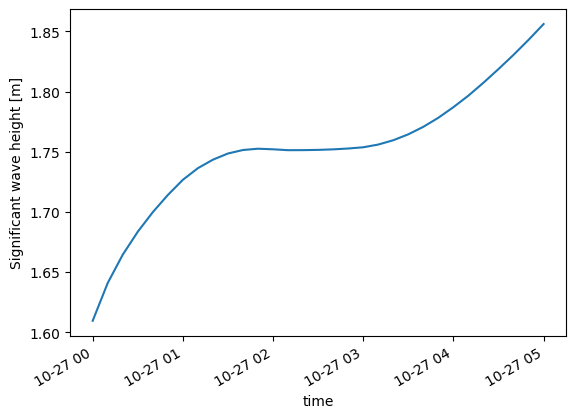

In [13]:
Hm0.plot();

### Area frequency spectra

In [14]:
fn = "../tests/testdata/spectra/area_freq_spectra.dfsu"
da = mikeio.read(fn)[0]
da

<mikeio.DataArray>
name: Directional integrated energy density
dims: (time:3, element:40, frequency:25)
time: 2017-10-27 00:00:00 - 2017-10-27 05:00:00 (3 records)
geometry: DfsuSpectral2D (40 elements, 33 nodes)

In [15]:
da.n_frequencies, da.n_directions

(25, 0)

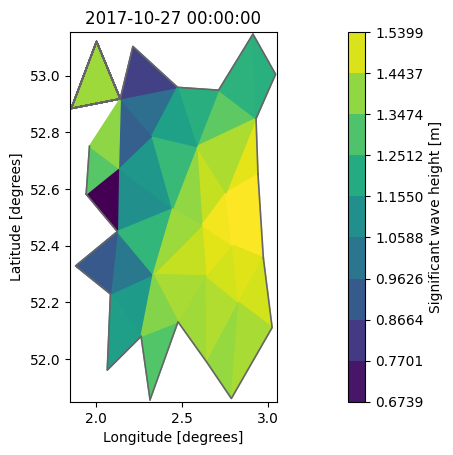

In [16]:
da.plot();

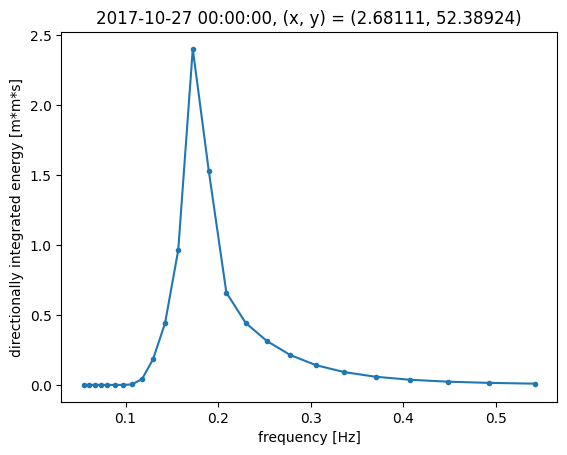

In [17]:
da.sel(x=2.7, y=52.4).plot();

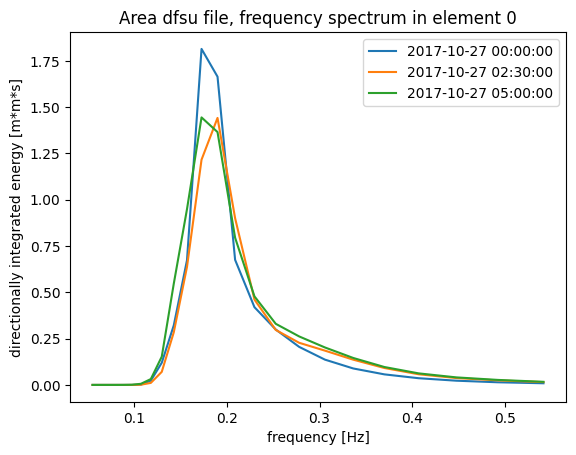

In [18]:
elem = 0
plt.plot(da.frequencies, da[:,elem].to_numpy().T)
plt.legend(da.time)
plt.xlabel("frequency [Hz]")
plt.ylabel("directionally integrated energy [m*m*s]")
plt.title(f"Area dfsu file, frequency spectrum in element {elem}");

## Directional spectra

Directional spectra have 0 frequencies. They can be of type point, line and area.

### Line directional spectra

In [19]:
fn = "../tests/testdata/spectra/line_dir_spectra.dfsu"
da = mikeio.read(fn)[0]
da

<mikeio.DataArray>
name: Frequency integrated energy density
dims: (time:4, node:10, direction:16)
time: 2017-10-27 00:00:00 - 2017-10-27 05:00:00 (4 records)
geometry: DfsuSpectral1D (9 elements, 10 nodes)

In [20]:
da.n_frequencies, da.n_directions

(0, 16)

In [21]:
da5 = da.isel(time=0).isel(node=5)
da5

<mikeio.DataArray>
name: Frequency integrated energy density
dims: (direction:16)
time: 2017-10-27 00:00:00 (time-invariant)
geometry: Point Spectrum Geometry(frequency:0, direction:16, x:4.21642, y:52.90296)
values: [0.04428, 0.01052, ..., 0.08194]

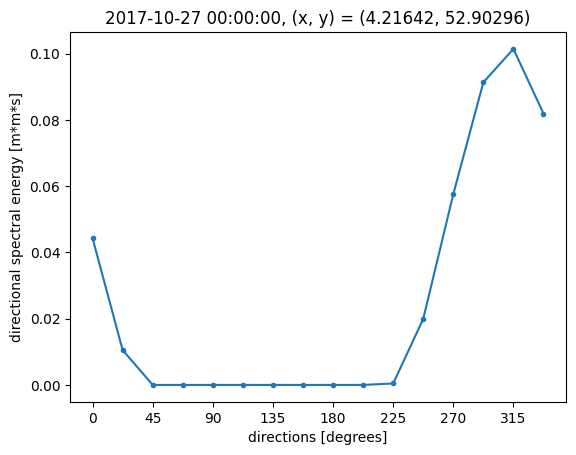

In [22]:
da5.plot();